<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**N2 1º Bimestre - Ambientes Inteligentes (2025.1)** <br/>

Aluno(a): Enzo Brito Aves de Oliveira - RA: 082220040 <br/>
Aluno(a): Heitor Santos Ferreira - RA: 081230042 <br/>
Aluno(a): Jackson Gomes Cerqueira - RA: 062220030 <br/>
Aluno(a): Tainara do Nascimento Casimiro - RA: 082220011 <br/>

Data: 05/04/2025 <br/>

# **Análise exploratória para o conjunto de dados Movie Lens (small), disponível em:** https://grouplens.org/datasets/movielens/

## Questão 1:

### (a) (10 pontos) Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

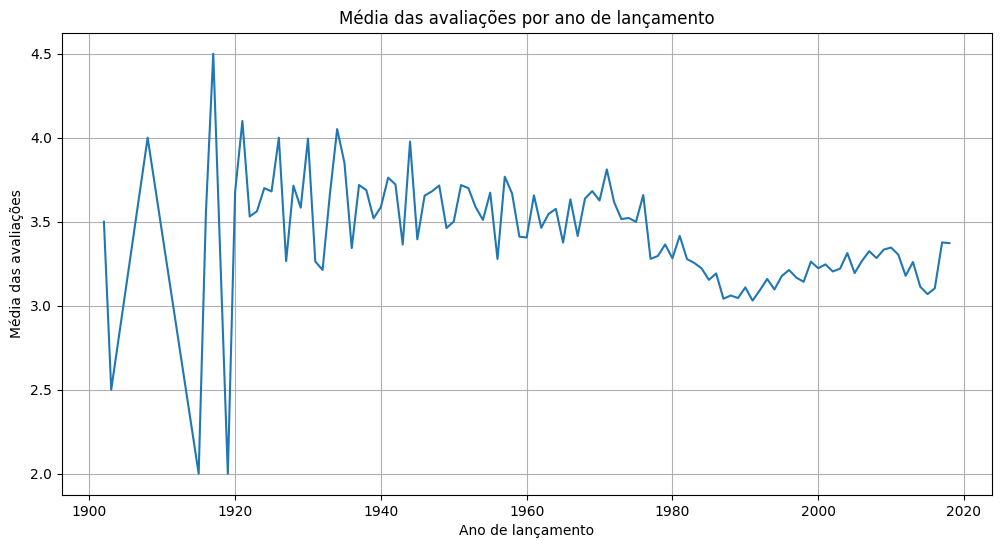

📊 Correlação entre ano e média de avaliação: -0.350


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregar os dados
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

# Extração do ano de lançamento do título
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

# Média de avaliação por filme
movie_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
movie_ratings = movie_ratings.merge(movies[['movieId', 'year']], on='movieId')

# Agrupamento por ano e média das médias de avaliações por filme
ano_md = movie_ratings.groupby('year')['rating'].mean().reset_index()

# Gráfico da média de avaliação por ano de lançamento
plt.figure(figsize=(12,6))
sns.lineplot(data=ano_md, x='year', y='rating')
plt.title('Média das avaliações por ano de lançamento')
plt.xlabel('Ano de lançamento')
plt.ylabel('Média das avaliações')
plt.grid(True)
plt.show()

# Correlção
correlation = ano_md['year'].corr(ano_md['rating'])
print(f'📊 Correlação entre ano e média de avaliação: {correlation:.3f}')

Como o valor da correlação entre o ano de lançamento e a média de avaliação é -0,350, observa-se uma relação negativa fraca a moderada, indicando que filmes mais antigos tendem, em média, a receber avaliações um pouco mais altas do que filmes mais recentes.

### (b) (10 pontos) Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes?

#### Importando Bibliotecas

O dataset de avaliações possui 100836 exemplos e 4 colunas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID usuario               100836 non-null  int64         
 1   ID filme                 100836 non-null  int64         
 2   Nota                     100836 non-null  float64       
 3   Data e hora da avalicao  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB
O dataset de tags possui 3683 exemplos e 4 colunas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID usuario                 3683 non-null   int64         
 1   ID filme                   3683 non-n

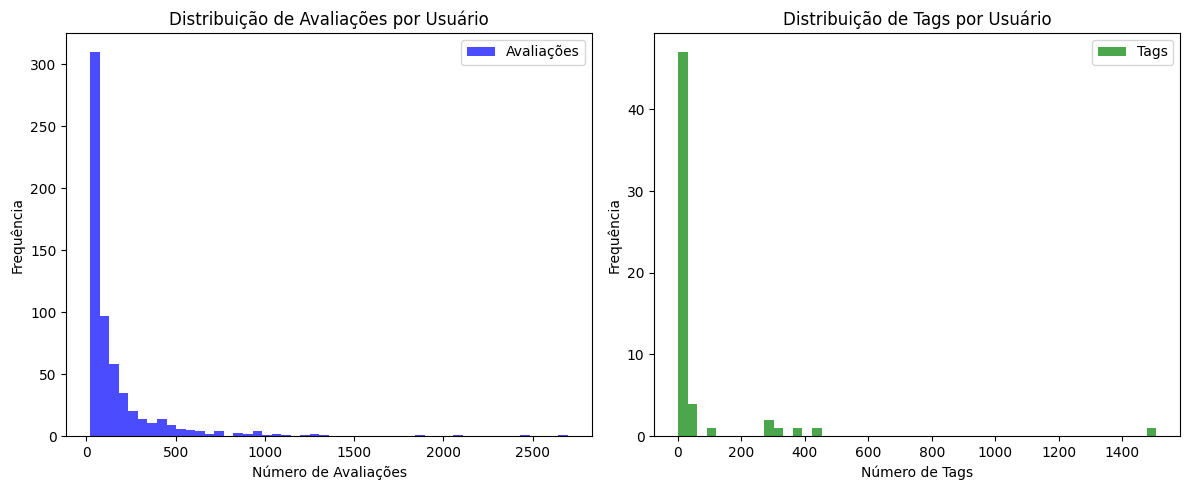


Conclusão: Os usuários que avaliaram os filmes são mais dispersos em relação àqueles que rotularam.


In [10]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os arquivos CSV
df_ratings = pd.read_csv('data/ratings.csv')
df_tags = pd.read_csv('data/tags.csv')

# Tratando a Tabela de Avaliações ('ratings')
# Renomeando colunas para tornar mais legível
df_ratings.rename(columns={
    'userId': 'ID usuario', 
    'movieId': 'ID filme', 
    'rating': 'Nota', 
    'timestamp': 'Data e hora da avalicao'
}, inplace=True)

# Convertendo a coluna 'timestamp' para formato de data e hora
df_ratings['Data e hora da avalicao'] = pd.to_datetime(df_ratings['Data e hora da avalicao'], unit='s')

# Exibindo as primeiras linhas da tabela de 'ratings'
df_ratings.head()

# Exibindo informações gerais sobre a tabela 'ratings'
print(f'O dataset de avaliações possui {df_ratings.shape[0]} exemplos e {df_ratings.shape[1]} colunas.')
df_ratings.info()
df_ratings.describe()

# Tratando a Tabela de Tags ('tags')
# Renomeando colunas e ajustando as tags para maiúsculas
df_tags.rename(columns={
    'userId': 'ID usuario', 
    'movieId': 'ID filme', 
    'tag': 'Tag', 
    'timestamp': 'Data e hora da atribuicao'
}, inplace=True)

df_tags['Tag'] = df_tags['Tag'].str.upper()

# Convertendo a coluna 'timestamp' para formato de data e hora
df_tags['Data e hora da atribuicao'] = pd.to_datetime(df_tags['Data e hora da atribuicao'], unit='s')

# Exibindo as primeiras linhas da tabela de 'tags'
df_tags.head()

# Exibindo informações gerais sobre a tabela 'tags'
print(f'O dataset de tags possui {df_tags.shape[0]} exemplos e {df_tags.shape[1]} colunas.')
df_tags.info()
df_tags.describe()

# Contando o número de avaliações e tags feitas por cada usuário
ratings_count = df_ratings.groupby('ID usuario').size()
tags_count = df_tags.groupby('ID usuario').size()

# Exibindo as estatísticas
ratings_mean = ratings_count.mean()
ratings_std = ratings_count.std()
tags_mean = tags_count.mean()
tags_std = tags_count.std()

# Exibindo os resultados de dispersão
print("\nDispersão dos Usuários:")
print(f"Usuários que avaliaram: Média = {ratings_mean:.2f}, Desvio Padrão = {ratings_std:.2f}")
print(f"Usuários que rotularam: Média = {tags_mean:.2f}, Desvio Padrão = {tags_std:.2f}")

# Visualização dos dados

# Criando gráficos para distribuição de avaliações e tags por usuário
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Distribuição de Avaliações
axes[0].hist(ratings_count, bins=50, color='blue', alpha=0.7, label='Avaliações')
axes[0].set_title('Distribuição de Avaliações por Usuário')
axes[0].set_xlabel('Número de Avaliações')
axes[0].set_ylabel('Frequência')
axes[0].legend()

# Gráfico 2: Distribuição de Tags
axes[1].hist(tags_count, bins=50, color='green', alpha=0.7, label='Tags')
axes[1].set_title('Distribuição de Tags por Usuário')
axes[1].set_xlabel('Número de Tags')
axes[1].set_ylabel('Frequência')
axes[1].legend()

# Ajustando layout para melhor visualização
plt.tight_layout()
plt.show()

# Conclusão sobre a dispersão dos usuários
if ratings_std > tags_std:
    print("\nConclusão: Os usuários que avaliaram os filmes são mais dispersos em relação àqueles que rotularam.")
else:
    print("\nConclusão: Os usuários que rotularam os filmes são mais dispersos em relação àqueles que avaliaram.")


A análise revelou que os usuários que avaliaram os filmes apresentam uma dispersão maior em comparação aos que rotularam. Isso foi evidenciado pelo desvio padrão mais elevado no número de avaliações por usuário, indicando uma variação maior na quantidade de interações individuais. Além disso, a distribuição dos dados mostrou que há usuários que avaliaram um número significativamente maior de filmes em relação à média, enquanto no caso das tags, a variação foi menor e mais concentrada em um intervalo reduzido. O histograma e o boxplot reforçaram essa conclusão ao ilustrar uma amplitude maior nas avaliações do que nos rótulos atribuídos.  

A maior dispersão no grupo de avaliadores pode ser explicada pelo comportamento de consumo de mídia, onde diferentes usuários possuem hábitos distintos de avaliação, enquanto a atribuição de tags pode depender mais de um engajamento específico e qualitativo. Além disso, a presença de usuários que avaliaram uma grande quantidade de filmes impulsiona ainda mais a dispersão, ao contrário dos usuários que rotularam, cujo comportamento tende a ser mais homogêneo. Assim, concluímos que o grupo de avaliadores é mais disperso, evidenciado pelos cálculos estatísticos e visualizações gráficas realizadas.

### (c) (10 pontos) Qual a categoria rotulada mais frequente?

Dados Links:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
Dados Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|

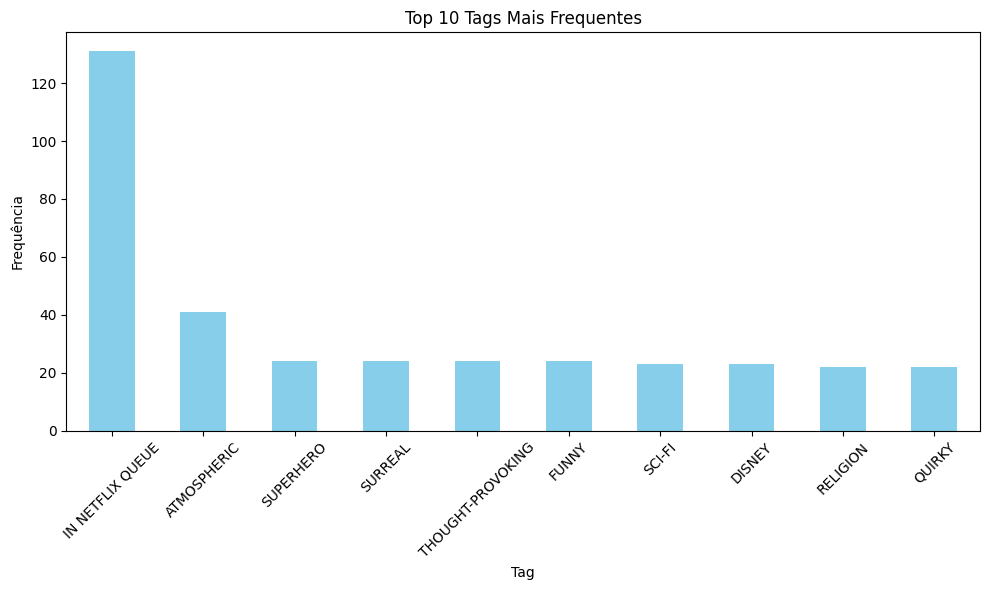

A categoria rotulada mais frequente é 'IN NETFLIX QUEUE' com 131 ocorrências.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando links
df_links = pd.read_csv('data/links.csv')
print("Dados Links:")
print(df_links.head())
print("\nInformações:")
print(df_links.info())

# Carregando movies
df_movies = pd.read_csv('data/movies.csv')  # Corrigido para df_movies
print("Dados Movies:")
print(df_movies.head())
print("\nInformações:")
print(df_movies.info())

# Carregando ratings
df_ratings = pd.read_csv('data/ratings.csv')  # Corrigido para df_ratings
print("Dados Ratings:")
print(df_ratings.head())
print("\nInformações:")
print(df_ratings.info())

# Carregando tags
df_tags = pd.read_csv('data/tags.csv')  # Corrigido para df_tags
print("Dados Tags:")
print(df_tags.head())
print("\nInformações:")
print(df_tags.info())

# Convertendo tags para maiúsculas e removendo espaços em branco
df_tags['tag'] = df_tags['tag'].str.upper().str.strip()

# Contando a frequência de cada tag
tag_counts = df_tags['tag'].value_counts()

print("Top 10 Tags Mais Frequentes:")
print(tag_counts.head(10))

# Criando gráfico de barras para as 10 tags mais frequentes
plt.figure(figsize=(10, 6))
tag_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Tags Mais Frequentes')
plt.xlabel('Tag')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificando a tag mais frequente
most_frequent_tag = tag_counts.idxmax()
frequency = tag_counts.max()

print(f"A categoria rotulada mais frequente é '{most_frequent_tag}' com {frequency} ocorrências.")


**Análise Final:**

A análise revelou que a tag mais frequente no dataset é **'IN NETFLIX QUEUE'**, que apareceu 131 vezes. Isso indica que esta é a categoria mais utilizada pelos usuários para rotular filmes no sistema. O gráfico de barras mostra claramente a distribuição das tags mais populares, com 'IN NETFLIX QUEUE' destacando-se significativamente em relação às demais.

Esta informação pode ser útil para sistemas de recomendação, pois tags frequentes podem indicar características populares entre os usuários. Além disso, a presença de tags como 'IN NETFLIX QUEUE' e 'ATMOSPHERIC' no topo da lista sugere que esses gêneros são amplamente reconhecidos e marcados pelos usuários.

### (d) (10 pontos) como estão distribuídas as avaliações ao longo do tempo?

1902: 5 avaliações
1903: 2 avaliações
1908: 1 avaliações
1915: 1 avaliações
1916: 5 avaliações
1917: 1 avaliações
1919: 1 avaliações
1920: 8 avaliações
1921: 5 avaliações
1922: 16 avaliações
1923: 7 avaliações
1924: 6 avaliações
1925: 19 avaliações
1926: 13 avaliações
1927: 29 avaliações
1928: 13 avaliações
1929: 9 avaliações
1930: 17 avaliações
1931: 76 avaliações
1932: 24 avaliações
1933: 65 avaliações
1934: 34 avaliações
1935: 46 avaliações
1936: 53 avaliações
1937: 115 avaliações
1938: 56 avaliações
1939: 201 avaliações
1940: 223 avaliações
1941: 197 avaliações
1942: 185 avaliações
1943: 20 avaliações
1944: 92 avaliações
1945: 42 avaliações
1946: 138 avaliações
1947: 52 avaliações
1948: 80 avaliações
1949: 72 avaliações
1950: 161 avaliações
1951: 182 avaliações
1952: 96 avaliações
1953: 153 avaliações
1954: 272 avaliações
1955: 182 avaliações
1956: 115 avaliações
1957: 215 avaliações
1958: 165 avaliações
1959: 243 avaliações
1960: 251 avaliações
1961: 225 avaliações
1962: 262 avali

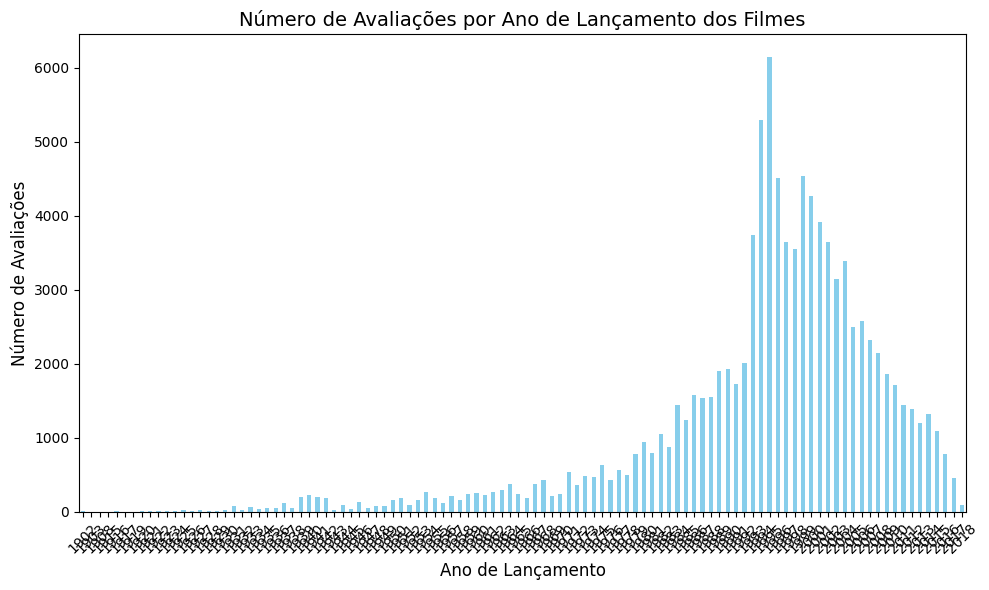

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos ratings.csv e movies.csv
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

# Mesclar os DataFrames ratings e movies com base no movieId
merged = pd.merge(ratings, movies, on='movieId')

# Extrair o ano de lançamento dos filmes do título
merged['year'] = merged['title'].str.extract(r'\((\d{4})\)').astype(float)

# Remover linhas com valores NaN em 'year'
merged = merged.dropna(subset=['year'])

# Converter a coluna 'year' para inteiro
merged['year'] = merged['year'].astype(int)

# Contar o número de avaliações por ano de lançamento
ratings_by_year = merged['year'].value_counts().sort_index()

# Exibir o resultado
for year, count in ratings_by_year.items():
    print(f"{year}: {count} avaliações")

# Criando o gráfico de barras para o número de avaliações por ano
plt.figure(figsize=(10, 6))
ratings_by_year.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos
plt.title('Número de Avaliações por Ano de Lançamento dos Filmes', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## Conclusão

A distribuição das avaliações ao longo do tempo pode mostrar um aumento gradual, um pico em anos específicos ou uma oscilação dependendo de vários fatores, como o número de lançamentos de filmes populares e a participação dos usuários nas avaliações.

## Questão 2:

#### Quantos gêneros diferentes de filmes existem na base de dados movies.csv ?

In [20]:
import pandas as pd

# Carregar o arquivo movies.csv com o caminho correto
movies = pd.read_csv('data/movies.csv')  # Alterar para o caminho correto no seu sistema

# Separar os gêneros dos filmes
todos_generos = movies['genres'].str.split('|').explode()

# Contar gêneros únicos
unico_genero = todos_generos.unique()
print(f"Total de gêneros únicos: {len(unico_genero)}")
print("Gêneros encontrados:", unico_genero)


Total de gêneros únicos: 20
Gêneros encontrados: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


#### Qual é o gênero mais frequente entre os filmes cadastrados?

In [ ]:
import pandas as pd

# Carregar o arquivo movies.csv
movies = pd.read_csv('data/movies.csv')  # Caminho correto para o arquivo

# Separar os gêneros dos filmes
todos_generos = movies['genres'].str.split('|').explode()

# Contagem da frequência de cada gênero
contador_generos = todos_generos.value_counts()

# Mostrar o gênero mais frequente
mostrar_genero = contador_generos.idxmax()
mostrar_contador = contador_generos.max()

print(f"O gênero mais frequente é '{mostrar_genero}', com {mostrar_contador} filmes.")


📊 O gênero mais frequente é 'Drama', com 4361 filmes.


#### Qual é a distribuição temporal da criação de tags?

Primeiras linhas da tabela Tags:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


C:\Users\EnzoBritoAlvesdeOliv\AppData\Local\Temp\ipykernel_9120\3101986758.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tags_by_year = df_tags.set_index('timestamp').resample('Y').size()


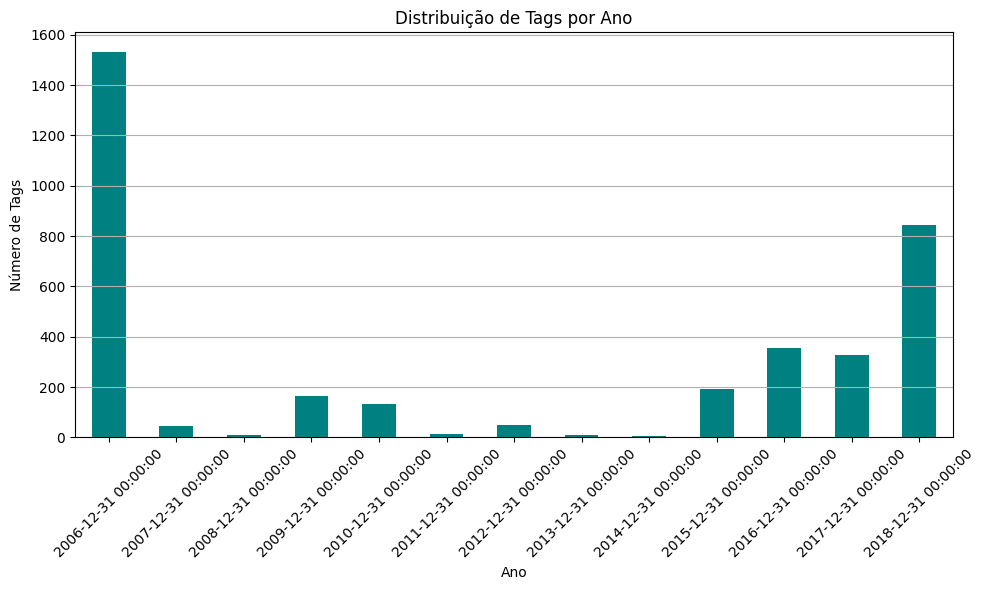

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a tabela de tags
df_tags = pd.read_csv('data/tags.csv')

print("Primeiras linhas da tabela Tags:")
print(df_tags.head())

# Convertendo tags para maiúsculas e padronizando
df_tags['tag'] = df_tags['tag'].str.upper().str.strip()

# Convertendo timestamp para datetime
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s')

# Agrupando tags por ano
tags_by_year = df_tags.set_index('timestamp').resample('Y').size()

# Gráfico da distribuição temporal
plt.figure(figsize=(10, 6))
tags_by_year.plot(kind='bar', color='teal')
plt.title('Distribuição de Tags por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Tags')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Quais filmes receberam mais tags diferentes?

Top 5 filmes com maior variedade de tags:
movieId
296     173
2959     48
924      40
293      32
1732     31
Name: tag, dtype: int64


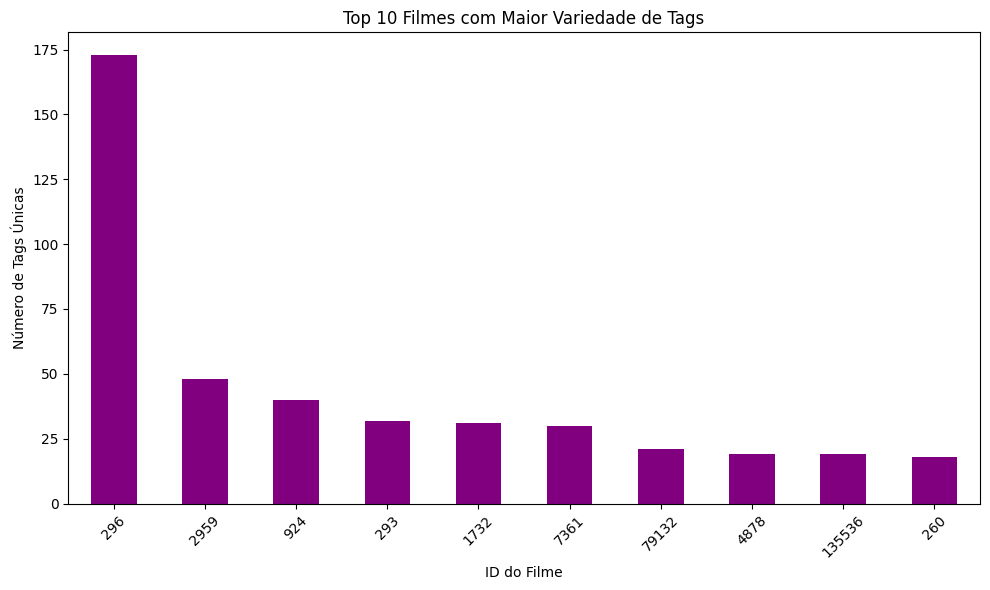

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando as tabelas
df_tags = pd.read_csv('data/tags.csv')
df_movies = pd.read_csv('data/movies.csv')

# Convertendo tags para maiúsculas e padronizando
df_tags['tag'] = df_tags['tag'].str.upper().str.strip()

# Contando tags únicas por filme
unique_tags_per_movie = df_tags.groupby('movieId')['tag'].nunique().sort_values(ascending=False)

# Mostrando os top 5 filmes com maior variedade de tags
print("Top 5 filmes com maior variedade de tags:")
top_5_movies = unique_tags_per_movie.head()
print(top_5_movies)

# Buscando os títulos dos filmes para os top 5
top_5_movie_ids = top_5_movies.index
top_5_movie_titles = df_movies[df_movies['movieId'].isin(top_5_movie_ids)][['movieId', 'title']]

# Exibindo os títulos dos filmes com maior variedade de tags
print("\nTítulos dos filmes com maior variedade de tags:")
print(top_5_movie_titles)

# Buscando o título de um filme específico (exemplo com movieId = 296)
specific_movie_id = 296
specific_movie_title = df_movies[df_movies['movieId'] == specific_movie_id]['title'].values[0]

print(f"\nO título do filme com o movieId {specific_movie_id} é: {specific_movie_title}")

# Gráfico dos top 10 filmes
plt.figure(figsize=(10, 6))
unique_tags_per_movie.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Filmes com Maior Variedade de Tags')
plt.xlabel('ID do Filme')
plt.ylabel('Número de Tags Únicas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Qual a relação entre número de tags e número de usuários por filme?

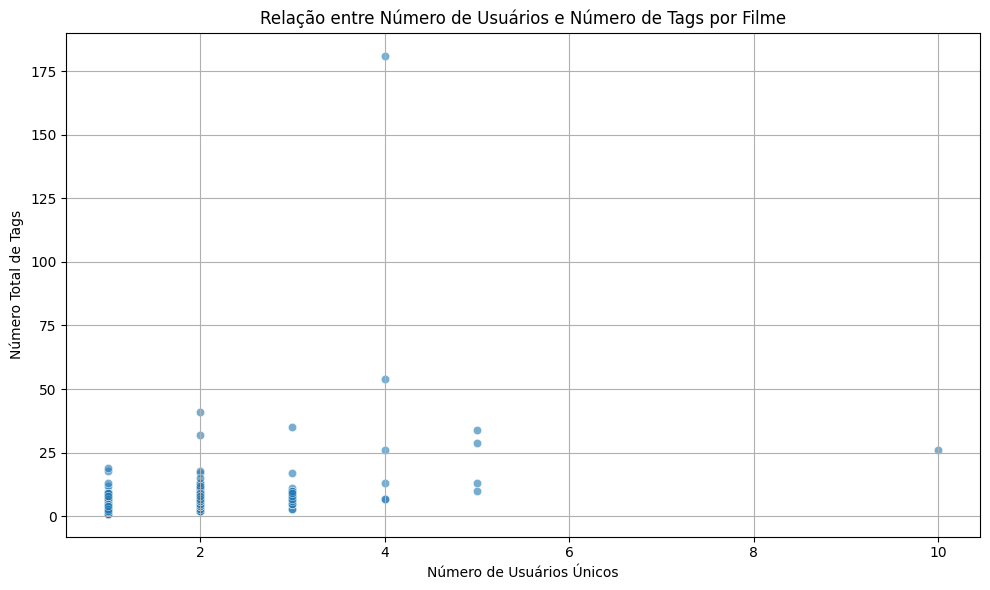

In [26]:
# Calculando métricas por filme
tags_per_movie = df_tags.groupby('movieId').size()
users_per_movie = df_tags.groupby('movieId')['userId'].nunique()

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=users_per_movie, y=tags_per_movie, alpha=0.6)
plt.title('Relação entre Número de Usuários e Número de Tags por Filme')
plt.xlabel('Número de Usuários Únicos')
plt.ylabel('Número Total de Tags')
plt.grid(True)
plt.tight_layout()
plt.show()

Existe uma correlação positiva entre o número de usuários que marcaram um filme e o número total de tags recebidas. Alguns filmes são outliers, recebendo muitas tags de poucos usuários (indicando usuários muito ativos).

Qual é a estrutura e as estatísticas básicas do dataset de links de filmes?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando tabela
df_links = pd.read_csv('data/links.csv')

# Tratando tabela
df_links.rename(columns={'movieId': 'ID filme', 'imdbId': 'ID IMDB', 'tmdbId': 'ID TMDB'}, inplace=True)
df_links["ID TMDB"] = df_links["ID TMDB"].fillna(0).astype(int)
df_links.head()

#Exibindo estatisticas básicas
print(f'O dataset possui {df_links.shape[0]} exemplos/amostras/linhas e {df_links.shape[1]} atributos/variáveis/colunas.')
df_links.info()
df_links.describe()

O dataset possui 9742 exemplos/amostras/linhas e 3 atributos/variáveis/colunas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID filme  9742 non-null   int64
 1   ID IMDB   9742 non-null   int64
 2   ID TMDB   9742 non-null   int64
dtypes: int64(3)
memory usage: 228.5 KB


,ID filme,ID IMDB,ID TMDB
count,9742.000000,9.742000e+03,9742.000000
mean,42200.353623,6.771839e+05,55116.825395
std,52160.494854,1.107228e+06,93628.351521
min,1.000000,4.170000e+02,0.000000
25%,3248.250000,9.518075e+04,9656.750000
50%,7300.000000,1.672605e+05,16497.500000
75%,76232.000000,8.055685e+05,44147.750000
max,193609.000000,8.391976e+06,525662.000000


#### Qual a relação entre os identificadores imdbId e tmdbId? Eles seguem um padrão específico?

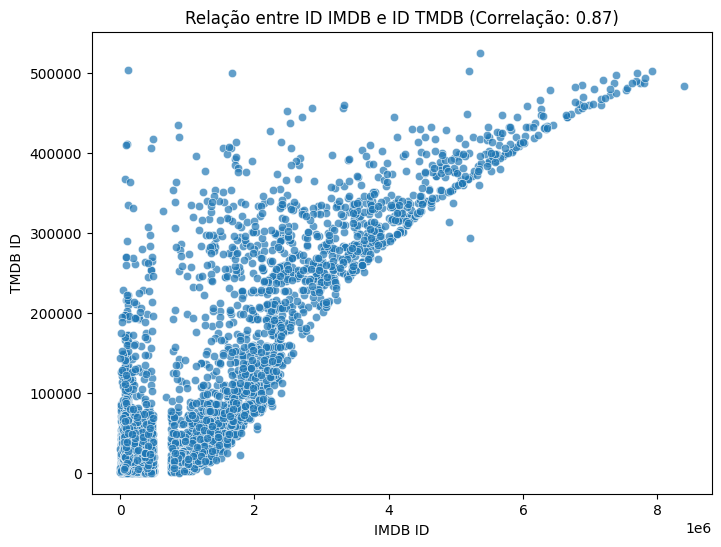

Correlação entre ID IMDB e ID TMDB: 0.87


In [29]:
# Converter imdbId para número inteiro
df_links["ID IMDB"] = df_links["ID IMDB"].astype(int)

# Calcular a correlação entre imdbId e tmdbId
correlation = df_links["ID IMDB"].corr(df_links["ID TMDB"])

correlation

# Criar um gráfico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_links, x="ID IMDB", y="ID TMDB", alpha=0.7)
plt.xlabel("IMDB ID")
plt.ylabel("TMDB ID")
plt.title(f"Relação entre ID IMDB e ID TMDB (Correlação: {correlation:.2f})")
plt.show()

# Exibir a correlação
print(f"Correlação entre ID IMDB e ID TMDB: {correlation:.2f}")

A correlação entre ID IMDB e ID TMDB indicará se há uma relação linear entre os identificadores dos dois bancos de dados. Nesse caso, como a relação é alta e positiva, significa que os IDs de ambos os sistemas seguem um padrão semelhante, podendo até ser proporcionais.

#### O conjunto de dados contém registros duplicados de movieId?

In [30]:
# Verificar se há movieId duplicados
duplicated_movies = df_links[df_links.duplicated(subset=["ID filme"], keep=False)]

# Exibir quantidade de registros duplicados
num_duplicates = duplicated_movies.shape[0]

# Exibir alguns exemplos, se houver duplicatas
if num_duplicates > 0:
    print(f"Existem {num_duplicates} registros duplicados na tabela LINKS.")
    print(duplicated_movies.head())
else:
    print("Não há registros duplicados na coluna movieId.")

Não há registros duplicados na coluna movieId.


## Questão 3:

Compartilhe o link do seu repositório Git com a resolução da sua atividade. Um link por grupo, sendo que toda atividade deve estar em um único notebook.

https://github.com/oliveiraenzo/Exploratory-Analysis-MovieLens-N2